In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="./static/css/custom.css">
<link rel="stylesheet" type="text/css" href="./static/css/highlight.css">

In [8]:
%matplotlib inline
%load_ext tsumiki

import datetime
import this
import time
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython import display
from ipywidgets import FloatSlider, IntSlider, interact
from jinja2 import Template

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Jupyterで広がるPythonの可能性

---
2018/09/17 @大田区産業プラザPiO  
driller@patraqushe


#### だれ？


* なまえ: どりらん
* 本名: driller
* Twitter: @patraqushe  
  
#### しごと

* デリバティブのトレーダー  
  たまにデイトレーダーと間違えられる  
  JavaとJavaScriptくらいの違い -> つまり大してかわらない
* 最近はPythonの仕事もしている

In [9]:
%%tsumiki

:Markdown:

### 共著

:Markdown::
            
#### PythonユーザのためのJupyter［実践］入門


* Jupyterのつかいかた
* pandasの基礎
* データの可視化
  **Matplotlibの豆腐で困ってる人は本書を読むように！**
* クラウド上のJupyter
* R, RubyでJupyter
* スライド, ipywidgetsなど  


:HTML::
<img src="./static/images/jupyterbook.jpg" width=300 />

In [10]:
%%tsumiki

:Markdown:

### Software Design 2018年2月号に寄稿
        
:Markdown::

第1特集「そのPythonライブラリ，どうして必要なんですか？」  
  
* 第1章：パッケージ管理の基礎を知ろう  
  効率的な開発のための前準備……石本 敦夫  
* 第2章：Pythonの基礎力を高めよう  
  ライブラリの使い方と作り方……くーむ
* 第3章：データ分析の前処理をさくっと終わらせよう  
  定時に帰るためのpandas入門……@driller  
* 第4章：イメージどおりにデータを可視化しよう  
  データに隠された意味を見つけるMatplotlib入門……片柳 薫子  

:HTML::
<img src="./static/images/sd201802.png" width=300 >

In [11]:
%%tsumiki

:Markdown:
### fin-py

:Markdown::
* Python x 金融のコミュニティ
* PyConJP 2016をきっかけに発足
* もくもく会(月例)
* トークイベント(不定期)
* スピンオフイベント(オプション勉強会など)

:HTML::
<img src="./static/images/finpy_600x600.png" width=300 />

#### ポスターセッションやってます

* Fintech x IoTの事例  
  社内でマイクロペイメント
* 仮想通貨損益計算サービス  
  Django
* Pythonでファイナンシャルプランニング  
  年金の最適化
* Quantopian  
  Pythonで株価分析・バックテスト  
* 衛星写真で原油生産状況を追う

In [20]:
%%tsumiki

:Markdown:
#### Agenda

:Markdown::
* Project Jupyter  
  Jupyterの歴史
* Jupyter Notebookの基本  
  基本を押さえて効率的に
* マジックコマンド  
  便利なコマンド集
* Unofficial Jupyter Notebook Extensions(nbextensions)  
  拡張機能で更に便利に

:Markdown::
* IPython.display  
  出力をカスタマイズ
* ipywidgets  
  インタラクティブに
* Jupyter Notebookでプレゼンテーション  
  資料作成を効率的に
* Jupyter Publishing  
  技術的な文書・WebサイトもJupyterで
* 便利なライブラリ・Webアプリケーション  
  更にJupyterを使いこなす

## 1. Project Jupyter

#### IPython
* 2001年 - Fernando Perez氏による開発  
  当時からMaple, Mathematicaを使用、後のNotebookに影響を与える
* REPLの拡張版
  - 型推定の強化
  - コード補完
  - マジックコマンド

### IPython Notebook
* 2011 - Fernando Pérez, Brian Granger氏による開発
* データサイエンティストに対して生のコードを説明してもわかりにくかった
* コードの追跡や共有を容易に

In [12]:
%%tsumiki

:Markdown::
### Project Jupyter
* 2014 - Fernando Pérez氏がIPythonからスピンオフしたJupyterプロジェクトを発表
* 名称は **Ju**lia **Py**thon **R** から
* 2018年9月時点では数十のコンピュータ言語に対応

:HTML::
<img src="./static/images/jupyter-logo.svg" width=300/>

#### Project Jupyter
User Interfaces |IPython    |Kernels                     |Widgets
----------------|-----------|----------------------------|--------------------------
JupyterLab      |IPython    |IPython                     |IPyWidgets/Jupyter Widgets
Jupyter Notebook|IPyParallel|IRkernel                    |widget-cookiecutter
Jupyter Console |Traitlets  |IJulia                      |-
Qt Console      |-          |Community maintained kernels|-


Notebook Documents|JupyterHub                |Deployment    |Foundations
------------------|--------------------------|--------------|-----------------------
nbconvert         |JupyterHub                |Docker Stacks |Jupyter Client
nbformat          |Zero to JupyterHub        |Kernel Gateway|Jupyter Core
nbviewer          |nbgrader                  |-             |Jupyter Alabaster Theme
-                 |All JupyterHub Projects...|-             |-

## 2. Jupyter Notebookの基本

## Jupyter NotebookのUI

* ノートブック
* ファイルマネージャ
* ターミナル

### ファイルマネージャ

最低限のことはJupyter上で行える
* 新規作成
* 削除
* リネーム
* asciiファイルの編集

### ターミナル

* Jupyterを起動した状態の環境変数を引き継ぐ
* 仮想環境が引き継がれるため、ライブラリのインストールが容易

### エディタ

* キーバインドが選べる
  - Sublime Text
  - Vim
  - emacs
* シンタックスハイライト

### Notebook

* セルにコードを記述して即座に実行できる  
  ターミナル上のREPLと比較して再編集が容易
* マークアップ記法によるテキストの埋め込み
* 画像出力(主にグラフ)の埋め込み
* HTMLを埋め込み

## 3行でわかるJupyter Notebookのすごさ
---
vmstatコマンドの事例

#### 1行目: vmstatコマンドを実行

In [9]:
%sc -l out=vmstat 1 5
out.l

['procs -----------memory---------- ---swap-- -----io---- -system-- ------cpu-----',
 ' r  b   swpd   free   buff  cache   si   so    bi    bo   in   cs us sy id wa st',
 ' 2  0      0 1900776 334136 1503092    0    0    72    25  212  613 13  2 84  1  0',
 ' 0  0      0 1900144 334136 1504660    0    0     0     0  896 2447 13  2 85  0  0',
 ' 1  0      0 1896548 334136 1507764    0    0     0     0 1416 3854 23  4 74  0  0',
 ' 1  0      0 1898168 334136 1504520    0    0     0     0 1174 3636 10  4 86  0  0',
 ' 1  0      0 1898036 334136 1504580    0    0     0     0  488 1523  3  1 96  0  0']

#### 2行目: pandas.DataFrameに変換

In [10]:
df = pd.DataFrame(out.fields()[2:], columns=out.fields()[1], dtype=float)
df

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st
0,2.0,0.0,0.0,1900776.0,334136.0,1503092.0,0.0,0.0,72.0,25.0,212.0,613.0,13.0,2.0,84.0,1.0,0.0
1,0.0,0.0,0.0,1900144.0,334136.0,1504660.0,0.0,0.0,0.0,0.0,896.0,2447.0,13.0,2.0,85.0,0.0,0.0
2,1.0,0.0,0.0,1896548.0,334136.0,1507764.0,0.0,0.0,0.0,0.0,1416.0,3854.0,23.0,4.0,74.0,0.0,0.0
3,1.0,0.0,0.0,1898168.0,334136.0,1504520.0,0.0,0.0,0.0,0.0,1174.0,3636.0,10.0,4.0,86.0,0.0,0.0
4,1.0,0.0,0.0,1898036.0,334136.0,1504580.0,0.0,0.0,0.0,0.0,488.0,1523.0,3.0,1.0,96.0,0.0,0.0


#### 3行目: 折れ線グラフに可視化

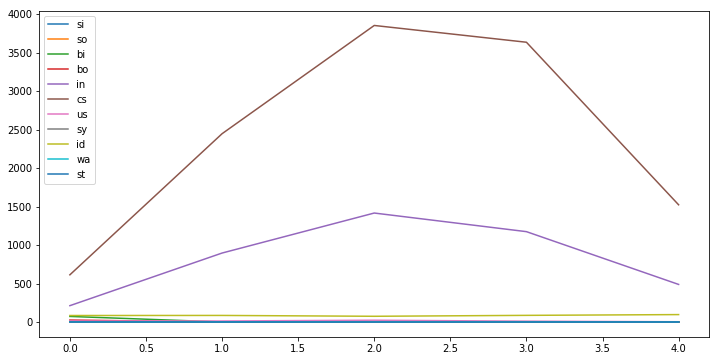

In [11]:
df.loc[:, "si":].plot(figsize=(12, 6));

#### 1つのセルにまとめた場合

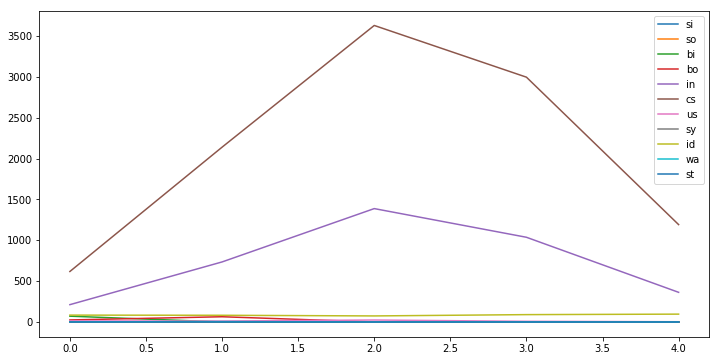

In [12]:
%sc -l out=vmstat 1 5
df = pd.DataFrame(out.fields()[2:], columns=out.fields()[1], dtype=float)
df.loc[:, "si":].plot(figsize=(12, 6));

#### 3行できたこと
* OSのコマンド結果をPythonのオブジェクトとして扱う
* テーブルデータをHTMLでみやすく表示
* データを可視化して埋め込み

### Jupyter Notebookの便利帳

#### Shift + Tab

![shift+tab](./static/images/shift-tab.png)

#### obj?

Docstringを確認できる
![obj?](./static/images/obj-question.png)

#### obj??

ソースコードを確認できる
![obj?](./static/images/obj-question2.png)

#### ?obj.*

オブジェクトをワイルドカードで検索できる
![?obj*](./static/images/question-obj.png)

In [30]:
%%tsumiki

:Markdown::
#### `_`, `__`, `___` (アンダースコア)
`_`: 直前の **実行結果**
`__`: 2つ前の **実行結果**
`___`: 3つ前の **実行結果**

<p>
実行した順番 ≠ セルの順番
</p>

:Markdown::
![obj?](./static/images/_,__,___.png)

In [15]:
%%tsumiki

:Markdown::
#### `_番号`
`_1`: セル番号1の実行結果
`_2`: セル番号2の実行結果
`_3`: セル番号3の実行結果

:Markdown::
![obj?](./static/images/_n.png)

In [16]:
%%tsumiki

:Markdown::
#### `_i`, `_ii`, `_iii`
`_i`: 直前に **実行した** 入力
`_ii`: 2つ前に **実行した** 入力
`_iii`: 3つ前に **実行した** 入力

<p>
実行した順番 ≠ セルの順番
</p>

:Markdown::
![obj?](./static/images/_i,_ii,_iii.png)

In [17]:
%%tsumiki

:Markdown::
#### `_i1`, `_i2`, `_i3`
`_i1`: セル番号1の入力
`_i2`: セル番号2の入力
`_i3`: セル番号3の入力


:Markdown::
![obj?](./static/images/_i1,_i2,_i3.png)

In [18]:
%%tsumiki

:Markdown::
#### `_dh`, `_oh`
`_dh`: Notebookのカレントディレクトリ
`_oh`: セル番号と実行結果の辞書
`_ih`: **入力した順番** リスト

:Markdown::
![obj?](./static/images/_dh,_oh_ih.png)

#### 標準出力は拾わない

In [23]:
print(1)

1


In [24]:
_

''

#### 事例:データの前処理を試す
* `,`を取り除く
* 型変換する
* 線形補間する

In [25]:
data = pd.Series(['1000', '2,000', np.nan, '4,000'])
data

0     1000
1    2,000
2      NaN
3    4,000
dtype: object

#### 通常の処理1
メソッドをつないでいく  
`data.method().method().method()...`  
* 途中経過がわからない
* 間の処理の問題を気づきにくい

#### 通常の処理2
別オブジェクトに格納していく

`do_something1 = data.method()`  
`do_something2 = do_something1.method()`  
`do_something3 = do_something2.method()`

* オブジェクト名を決めるのが大変  
  - 名前のバッティング
  - 意味のある名前をつけようとすると大抵長くなる

#### _の活用例
`,`を取り除く

In [26]:
_.str.replace(",", "")

0    1000
1    2000
2     NaN
3    4000
dtype: object

#### _の活用例
型変換する

In [27]:
_.astype(float)

0    1000.0
1    2000.0
2       NaN
3    4000.0
dtype: float64

#### _の活用例
線形補間する

In [28]:
_.interpolate()

0    1000.0
1    2000.0
2    3000.0
3    4000.0
dtype: float64

#### まとめ
* 最終的には下記のようにつなげればよいことがわかる
* 途中経過を確認できる

In [29]:
"".join((_iii, _ii, _i)).replace("_", "")
# このような書き方も
# "".join(_ih[start:end]).replace("_", "")

'.str.replace(",", "").astype(float).interpolate()'

#### !, !!

* `!`を行頭につけるとOSのコマンドが実行できる
* `!!`上記の機能に加え、結果をリストに格納できる

#### !の例

In [31]:
!ls sample

file1.csv  file2.csv


In [32]:
!cat sample/file1.csv

111,222,333
100,200,300

#### !!の例

In [33]:
!!cat sample/file1.csv

['111,222,333', '100,200,300']

## 3. マジックコマンド

### マジックコマンドとは
* IPython独自のコマンド
* line magic: 1行で実行するコマンド
* cell magic: セル全体に適用されるコマンド
* ユーザがマジックコマンドを作成できる(拡張マジック)

### line magic

### マジックコマンドのリファレンス

* %magic  
  すべてのマジックコマンドのリファレンス
* %lsmagic  
  マジックコマンドのリスト
* %quickref  
  IPythonのクイックリファレンス

In [34]:
%%tsumiki

:Markdown:
### OSコマンド関連

:Markdown::
#### ディレクトリ  
* %cd, %pwd, 
#### ファイル・ディレクトリ操作
* %cp, %mv, %rm, %rmdir
#### ls
* %ldir, %lf, %lk, %ll, %ls, %lx

:Markdown::
#### ファイルの内容
* %cat, %less, %more
#### man
* %man
#### 環境変数
* %env, %set_env

#### OSコマンド関連

* `!`で代用できるコマンドだがOS依存がなくなる  
  Windowsで`ls`や`pwd`が気軽にできる！
* 結果をオブジェクトに格納できるコマンドがある  
  - %pwd -> str
  - %env -> dict

### 名前空間関連

* %who, %who_ls, %whos
* %reset, %reset_selective, %xdel
* %psearch
* %pinfo, %pinfo2

### 名前空間関連

* Notebook上では名前空間が汚染されることが多い  
  - 一度セルを実行すると、セルを消してもglobalsに残る
  - 意図せぬ結果となりバグの温床に
* マジックコマンドでオブジェクトを管理
  - 一覧
  - 検索
  - 情報取得
  - 消去、リセット

#### %who, %who_ls, %whos
* ユーザが作成したglobals()の内容を表示  
  `__name__`などの特殊なオブジェクトは出てこない

In [40]:
i = 1
s = "a"
%whos

Variable   Type    Data/Info
----------------------------
i          int     1
s          str     a


### デバッグ関連

* %debug, %pdb

### プロファイル関連

* %prun

#### %prun

![prun](./static/images/prun.png)

### 実行関連

* %run, %rerun, %rep, %recall
* %sc, %sx, %system
* %time, %timeit

#### %system, %sx, %sc

* %system, %sx  
  `!!`と等価  
  コマンドの実行結果をリストに取り込める
* %sc  
  %sxよりも詳細な挙動を設定できる
  - `-l`:結果をリストに格納
  - `-s`:空白文字をセパレータとして処理

#### %time, %timeit

* %time  
  コードの実行時間を出力
* %timeit  
  コードを複数回実行して統計した結果を出力  
  さまざまなオプションを設定できる

### 拡張関連

* %load_ext  
  拡張マジックを呼び出す  
  マジックコマンドはPythonで自作できる
* %unload_ext  
  ロードしたマジックコマンドをアンロード

### cell magic

#### %%writefile, %%file
* セルに記述した内容をファイルに書き出す
* モジュール化したい場合などに便利
* 外部データやモジュールが必用な場合でも、1つのNotebookで完結できる
  -> 配布が楽

In [42]:
%%writefile sample/hello.py

def func():
    return "hello world"

Writing sample/hello.py


In [43]:
from sample import hello

hello.func()

'hello world'

#### %%time, %%timeit

`%time`, `%timeit`をセル全体に対して実行できる

#### %%!, %%system, %%sx

`!!`, `%system`, `%sx`をセル全体に対して実行できる

In [44]:
%%sx

cat sample/file1.csv
echo
cat sample/file2.csv

['111,222,333', '100,200,300', 'AAA,BBB,CCC']

#### %%capture

標準出力と標準エラーをオブジェクトに格納できる

In [45]:
%%capture capture_out

print(1)

In [46]:
capture_out.stdout

'1\n'

#### %%bash
bashを実行する

In [47]:
%%bash

for file in sample/*.csv
do
  grep 1 $file
done

111,222,333
100,200,300


#### %%python2
python2のコードを実行する

In [48]:
%%python2

def func():
    yield 1

func().next()
print range(3)

[0, 1, 2]


#### %%pypy

* PythonのコードをPyPyから実行する
* `pypy3`ではなく`pypy`を呼び出す  
  `pypy3`にする場合には環境変数やPATHを工夫する

#### Pythonで実行した場合

In [49]:
import time

start = time.time()
for x in range(1000000):
    x ** 2

print(time.time() - start)

0.490006685256958


#### PyPyで実行した場合

In [50]:
%%pypy

import time

start = time.time()
for x in range(1000000):
    x ** 2

print(time.time() - start)

0.007111549377441406


実行速度が**70**倍に！

#### %%javascript, %%js
JavaScriptのコードを実行

In [20]:
%%javascript

function fizzbuzz(n) {
    if (n % 3 == 0 && n % 5 == 0) return "Fizz,Buzz";
    else if (n % 3 == 0) return "Fizz";
    else if (n % 5 == 0) return "Buzz";
    else return n;
}

console.log(element.text(fizzbuzz(5)))

<IPython.core.display.Javascript object>

#### %%ruby
Rubyのコードを実行

In [52]:
%%ruby

def fizzbuzz(n)
    if n%15==0
        return "FizzBuzz"
    elsif n%3==0
        return "Fizz"
    elsif n%5==0 
        return "Buzz"
    else
        return n
    end
end

puts fizzbuzz(3)

Fizz


#### %%perl
Perlのコードを実行

In [53]:
%%perl

sub fizzbuzz {
    my ($n) = @_;
    if ( $n % 3 == 0 && $n % 5 == 0 ) {
        return "Fizz,Buzz";
    }
    elsif ( $n % 3 == 0 ) {
        print "Fizz";
    }
    elsif ( $n % 5 == 0 ) {
        return "Buzz";
    }
    else {
        return $n;
    }
}

print fizzbuzz(15)

Fizz,Buzz

#### %%script

* 引数をシバン(#!)のように扱える  
  つまり、なんでもできる

#### juliaの実行例

In [54]:
%%script julia

function fizzbuzz(n)
    if n % 15 == 0
        println("fizzbuzz")
    elseif n % 5 == 0
        println("buzz")
    elseif n % 3 == 0
        println("fizz")
    else
        println(n)
    end
end 

println(3)

fizzbuzz (generic function with 1 method)
3


#### display関連
セルに記述された内容をレンダリングして出力  
詳細は`IPython.display`で解説
* %%HTML, %%html
* %%SVG, %%svg
* %%markdown
* %%latex

### Jupyter NotebookでSQL

#### ipython-sql
* 拡張マジックコマンド
  - %sql, %%sql
* SQLAlchemyからDBに接続  
* pandas.DataFrameに対応

#### テーブルを作成

In [55]:
%load_ext sql

In [56]:
%%sql sqlite://
CREATE TABLE sample_table (name, age);
INSERT INTO sample_table VALUES ('Nagato', 16);
INSERT INTO sample_table VALUES ('Mikuru', 17);

Done.
1 rows affected.
1 rows affected.


[]

#### SELECTの結果をDataFrameに

In [57]:
%%sql
SELECT * from sample_table;

 * sqlite://
Done.


name,age
Nagato,16
Mikuru,17


In [58]:
_.DataFrame()["age"].mean()

16.5

## 4. Unofficial Jupyter Notebook Extensions

#### Unofficial Jupyter Notebook Extensions
※ 以降は`nbextensions`と表記

* Notebookに機能を追加する拡張機能群
* JavaScript
* ローカルブラウザで動作

#### ExecuteTime

* セルの実行時間が表示される
* デフォルトで表示されるため、`%%time`よりお手軽

![ExecuteTime](./static/images/ExecuteTime.png)

#### Snippets

* ドロップダウンで登録済みのスニペットをセルに貼付け
* 任意のコードやマークアップなどを登録できる
* さまざまな用途に  
  - import
  - docstringのテンプレート
  - チートシート代わり

#### よくやるimport処理

![import matplotlib](./static/images/snipet_import.png)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#### docstringのテンプレート

![import matplotlib](./static/images/snipet_numpy.png)

In [ ]:
def func(arg1, arg2):
    """Summary line.
    
    Extended description of function.
    
    Parameters
    ----------
    arg1 : int
        Description of arg1
    arg2 : str
        Description of arg2
    
    Returns
    -------
    bool
        Description of return value
    
    """
    return

#### Snippets Menu
* 予めよくつかわれるスニペットが登録されている
  - numpy, scipy, matplotlib, sympy, pandas
  - astropy, h5py, numba
  - python
 - markdown
* カスタマイズできる

### Jupyter Notebookでもきれいなコードを書く

#### pycodestyle_magic

* 拡張マジック
* [pycodestyle](http://pycodestyle.pycqa.org/en/latest/)のcell magic
* PEP8に違反した箇所を出力
* コードは実行しないので注意

In [61]:
%load_ext pycodestyle_magic

In [62]:
%%pycodestyle

def f(x,y ):
    return x**+y
print(3,2)

2:8: E231 missing whitespace after ','
2:10: E202 whitespace before ')'
4:1: E305 expected 2 blank lines after class or function definition, found 0
4:8: E231 missing whitespace after ','


#### Ruler

* nbextensions
* 指定した文字数に縦線を描画
* コード1行当たりの文字数の上限を可視化できる
* 線の色やスタイルが変更できる
* 線は複数設定できる  
  インデントの可視化など

![Ruler](./static/images/Ruler.png)

#### isort formatter

* [isort](http://timothycrosley.github.io/isort/)のnbextensions
* <i class="fa-legal fa"></i>ボタン1発でimport文を並び替える

#### Before

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import ast

#### After<i class="fa-legal fa"></i>

In [ ]:
import ast
from datetime import datetime

import numpy as np
import pandas as pd

#### コードフォーマッタ

* [autopep8](https://github.com/hhatto/autopep8)  
  nbextensions:Autopep8
* [yapf](https://github.com/google/yapf)  
  nbextensions:Code prettify
* [Black](https://black.readthedocs.io/en/stable/index.html)  
  cell magic:[blackcellmagic](https://github.com/csurfer/blackcellmagic)  
  nbextensions:[jupyter-black](https://github.com/drillan/jupyter-black)

#### おだい:このコードをなんとかする
```python
pd.DataFrame(data={"A":[1000,2000,3000,4000,5000,6000],"B":[.001,.002,.003,.004,.005,.006],},index=range(1,7),dtype=int,).reindex(range(1,10)).append(pd.DataFrame([[8000,.008]],columns=["A","B"])).interpolate(method="index",axis=0,limit=10000,inplace=False,limit_direction="forward",limit_area="inside",downcast="infer",)
```

#### Autopep8
<i class="fa-legal fa"></i>ボタン1発で整形できる

In [ ]:
pd.DataFrame(data={"A": [1000, 2000, 3000, 4000, 5000, 6000], "B": [.001, .002, .003, .004, .005, .006], }, index=range(1, 7), dtype=int,).reindex(range(1, 10)).append(
    pd.DataFrame([[8000, .008]], columns=["A", "B"])).interpolate(method="index", axis=0, limit=10000, inplace=False, limit_direction="forward", limit_area="inside", downcast="infer",)

#### Code prettify(yapf)
<i class="fa-legal fa"></i>ボタン1発で整形できる

In [ ]:
pd.DataFrame(
    data={
        "A": [1000, 2000, 3000, 4000, 5000, 6000],
        "B": [.001, .002, .003, .004, .005, .006],
    },
    index=range(1, 7),
    dtype=int,
).reindex(range(1, 10)).append(
    pd.DataFrame([[8000, .008]], columns=["A", "B"])).interpolate(
        method="index",
        axis=0,
        limit=10000,
        inplace=False,
        limit_direction="forward",
        limit_area="inside",
        downcast="infer",
    )

#### %%blackcellmagic
セルマジックを使う

In [ ]:
%load_ext blackcellmagic

In [ ]:
%%black
pd.DataFrame(data={"A":[1000,2000,3000,4000,5000,6000],"B":[.001,.002,.003,.004,.005,.006],},index=range(1,7),dtype=int,).reindex(range(1,10)).append(pd.DataFrame([[8000,.008]],columns=["A","B"])).interpolate(method="index",axis=0,limit=10000,inplace=False,limit_direction="forward",limit_area="inside",downcast="infer",)

In [ ]:
pd.DataFrame(
    data={
        "A": [1000, 2000, 3000, 4000, 5000, 6000],
        "B": [.001, .002, .003, .004, .005, .006],
    },
    index=range(1, 7),
    dtype=int,
).reindex(range(1, 10)).append(
    pd.DataFrame([[8000, .008]], columns=["A", "B"])
).interpolate(
    method="index",
    axis=0,
    limit=10000,
    inplace=False,
    limit_direction="forward",
    limit_area="inside",
    downcast="infer",
)

#### jupyter-black

* blackはnbextensionsがない(2018/09/17時点)
* ないので作った
* ほかのフォーマッタ同様に <i class="fa-legal fa">Black</i> ボタン1発でコードを整形できる
* 公式でnbextensionsを出してくれたらお役御免に

## 5. IPython.display

### IPython.display

* `DisplayObject`を継承したクラス
* 文字列やURLから得たデータをレンダリングしてNotebook上に表示
* cell magicで代用できるものが多い

#### HTML
* raw HTMLデータを表示
* URLやローカルPATHを指定できる
* JavaScriptも動作する
* これさえ使えれば、表示上の問題は大抵どうにかなる

In [63]:
display.HTML("<font color=red>Red</font>")

#### HTMLを利用してNotebookのスタイルも変更できる

実行前
![width before](./static/images/width100_before.png)
実行後
![width after](./static/images/width100_after.png)

横幅を有効活用

#### Markdown
* マークダウン記法で記述したテキストを表示
* URLやローカルPATHを指定できる
* GFMに対応

In [13]:
%%markdown
col1|col2
----|----
data|data

col1|col2
----|----
data|data

#### Markdownの応用事例
* `format`関数やf-stringと組み合わせられる
* Jinja2と組み合わせるといろいろできる

#### 現在時刻に合わせてMarkdownであいさつする

In [14]:
hour = datetime.datetime.now().timetuple().tm_hour
oha = 4 <= hour < 11
kon = 11 <= hour < 18
ban = 18 <= hour or 0 <= hour < 4

greetings = np.array(["おはようございます", "こんにちは", "こんばんは"])
greeting = greetings[np.array([oha, kon, ban])][0]
display.Markdown(f"# みなさん{greeting}")

# みなさんこんばんは

#### The Zen of PythonをMarkdownで表示する

In [ ]:
zen_op_python = "".join([this.d.get(c, c) for c in this.s]).split("\n")

tpl_text = """
#### {{ title }}
{% for item in item_list %}
  * {{ item }}
{% endfor %}
"""

tpl = Template(tpl_text)
display.Markdown(
    tpl.render({"title": zen_op_python[0], "item_list": zen_op_python[2:]})
)

In [67]:
zen_op_python = "".join([this.d.get(c, c) for c in this.s]).split("\n")

tpl_text = """
#### {{ title }}
{% for item in item_list %}
  * {{ item }}
{% endfor %}
"""

tpl = Template(tpl_text)
display.Markdown(
    tpl.render({"title": zen_op_python[0], "item_list": zen_op_python[2:]})
)


#### The Zen of Python, by Tim Peters

  * Beautiful is better than ugly.

  * Explicit is better than implicit.

  * Simple is better than complex.

  * Complex is better than complicated.

  * Flat is better than nested.

  * Sparse is better than dense.

  * Readability counts.

  * Special cases aren't special enough to break the rules.

  * Although practicality beats purity.

  * Errors should never pass silently.

  * Unless explicitly silenced.

  * In the face of ambiguity, refuse the temptation to guess.

  * There should be one-- and preferably only one --obvious way to do it.

  * Although that way may not be obvious at first unless you're Dutch.

  * Now is better than never.

  * Although never is often better than *right* now.

  * If the implementation is hard to explain, it's a bad idea.

  * If the implementation is easy to explain, it may be a good idea.

  * Namespaces are one honking great idea -- let's do more of those!


#### FileLink, FileLinks

* PATHのハイパーリンクを作成
* GitHubのリポジトリから参照させたい場合などに便利

In [69]:
display.FileLinks("./sample/")

./sample/
  file2.csv
  file1.csv

#### Image, SVG, Video, YouTubeVideo
* 画像・動画を表示
* URLやPATHの指定ができる

####  display
* オブジェクトをフロントエンドとして表示  
  pandas.DataFrameなど
* 表示形式をカスタマイズできる

#### displayの使用例

In [71]:
df1 = pd.DataFrame([[1, 2], [3, 4]])
df2 = pd.DataFrame([[10, 20], [30, 40]])

df1
df2

,0,1
0,10,20
1,30,40


通常は最後のオブジェクトしか表示されない

In [72]:
display.display(df1)
display.display(df2)

,0,1
0,1,2
1,3,4


,0,1
0,10,20
1,30,40


#### カスタマイズ例

In [73]:
class Json(object):
    def __init__(self, json):
        self.json = json

    def _repr_pretty_(self, pp, cycle):
        import json

        pp.text(json.dumps(self.json, indent=2))

    def __repr__(self):
        return str(self.json)

display.display(Json({1: 2, 3: {4: 5}}))

{
  "1": 2,
  "3": {
    "4": 5
  }
}

#### clear_output

* 表示を消去する
* 表示した情報を更新する場合に便利
  - 出力を追記ではなく上書きする
  - 画像を表示して差し替える(アニメーション)

In [15]:
for i in range(5):
    print(i)
    time.sleep(2)
    display.clear_output(wait=True)

4


#### update_display

* `display`で一度表示した情報を更新
* 複数の表示情報を制御できる
* ipywidgetsと組み合わせると便利

In [ ]:
display.display(pd.DataFrame(np.random.rand(4, 4)), display_id="df1")

In [ ]:
for i in range(5):
    display.update_display(pd.DataFrame(np.random.rand(4, 4)), display_id="df1")
    time.sleep(1)

## 6. ipywidgets

#### ipywidgets
* Notebook上にインタラクティブなUIを提供
* 多数のインタフェース  
  Button, Slider, Dropdown, RadioButtons, Date picker...
* 実装が容易

#### 3行でできるUI

In [ ]:
@interact(checked=True, selected=["A", "B", "C"])
def f(checked, selected):
    return checked, selected

#### 事例:ファンドの組み入れ比率
* 複数の投資信託の投資比率を考えてみる  
  ファンドA, ファンドB, ファンドC
* できるだけリターンを大きくしたい
* できるだけリスクを小さくしたい

#### 投資比率をパラメータ化
1. リターンとリスクを算出する関数を作成
2. パラメータを変更して`1.`の結果を確認

* パラメータを手入力で変更するのは大変
* すべての組み合わせを一覧化・可視化すると情報が多すぎる
* 状況に応じて裁量でパラメータを調整したい

#### ipywidgetsでインタラクティブにリターンとリスクを可視化

In [ ]:
def fund_returns(s0, mu, sigma, t, dt):
    return s0 * np.exp(
        np.cumsum(np.random.normal(mu * dt, sigma * np.sqrt(dt), round(t / dt)))
    )


def get_return_and_risk(a, b):
    weight = (a, b, 1 - sum((a, b)))
    return_df = df * weight
    return return_df.sum(axis=1).pct_change().var(), return_df.iloc[-1].sum() / 100


np.random.seed(9)
fund_a = fund_returns(100, 0.1, 0.15, 1, 0.01)
fund_b = fund_returns(100, 0.12, 0.4, 1, 0.01)
fund_c = fund_returns(100, 0.05, 0.1, 1, 0.01)
df = pd.DataFrame({"A": fund_a, "B": fund_b, "C": fund_c})


@interact(
    a=FloatSlider(0.3, min=0.0, max=1.0, step=0.1, continuous_update=False),
    b=FloatSlider(0.3, min=0.0, max=1.0, step=0.1, continuous_update=False),
)
def plot_return_and_risk(a, b):
    c = 1 - sum((a, b))
    fig = plt.figure(figsize=(14, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(fund_a, label="FundA")
    ax1.plot(fund_b, label="FundB")
    ax1.plot(fund_c, label="FundC")
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.legend()
    ax2.set_title(f"a:{a:.2}0%, b:{b:.2}0%, c:{c:.2}0%", fontsize=20)
    ax2.set_xlim(0, 0.002)
    ax2.set_xlabel("Risk", fontsize=20)
    ax2.set_ylabel("Return", fontsize=20)
    ax2.set_ylim(0.8, 1.5)
    ax2.scatter(*get_return_and_risk(a, b), s=1000)
    ax2.axvline(0.001, c="black")
    ax2.axhline(1.0, c="black")

## 7. Jupyter Notebookでプレゼンテーション

#### 資料作成の悩み
1. 資料に使えそうなコードを書く
2. コードや実行結果をスライドに転記する
3. `1.`を途中で変更する
4. ウギャーとなる  
  - 転記が大変
  - 漏れが出る

#### Jupyter Notebook
* スライドに変換する機能がある(nbconvert)
* マークダウンで書ける
* コードも実行結果もそのままスライドにできる
* ウギャーとならない

#### Jupyter Notebookでいいんじゃね？
* 変換がメンドウ
* 変換後はコードが実行できない

#### RISE
* Reveal.jsを利用したnbextensions
* ボタン1発でNotebookからスライドに
* スタイルをカスタマイズできる
* スライド上からコードを実行できる
* nbpresentというツールもあるらしい

RISEを使うとインタラクティブなプレゼンが可能に

#### コードが邪魔
* 大抵において、プレゼン資料で必用なのはコードではなく実行結果  
  - テーブルデータ(pandas.DataFrameなど)
  - グラフ(Matplotlibなど)
* 隠せるものなら隠したい  
  - 全部のコード
  - 一部のコード

#### Hide_code
* nbextensions
* チェックした項目を隠せる  
  - [ ] Hide Prompts
  - [ ] Hide Code
  - [ ] Hide Outputs

#### cellの内容を固定したい
* コードは見せたいが実行したくない
* 一度実行した結果を固定したい

#### Freeze
セルを読み取り専用にしたり、実行不可にできる  

* <i class="fa-lock fa"></i> read-only  
  変更したくないセルにプロテクトをかけられる
* <i class="fa-unlock-alt fa"></i> unlock
* <i class="fa-asterisk fa"></i> frozen(実行不可)  
  `Rull All`を実行した際に、実行したくないセルをスキップできる

In [75]:
%%tsumiki

:Markdown:
#### 段組みにしたい

:Markdown::
* よのなかのアスペクト比はどんどん横長に
* プレゼン資料で横長の文章は読みづらい
* 左右に分割して比較をしたい

:Markdown::
* ここには
* 有効なスペースが
* ありますよ

#### tsumiki
* どりらんが考案したマークアップ記法
* MarkdownやHTMLで記載した内容を複数列に表示できる
* IPython/Jupyter Notebookのcell magicに対応
* Jinja2に対応

In [31]:
%%tsumiki

:Markdown:
#### Main Title
:Markdown::
##### Sub Title1
* col1
* Markdown
:HTML::
<h5>Sub Title2</h5>
<ul>
  <li><font color="red">col2</font></li>
  <li><font color="green">HTML</font></li>
</ul>

#### Jinja2に対応

In [6]:
today = datetime.date.today()
tenki = [["23区", "晴れ"], ["練馬区", "ゲリラ豪雨"]]

NameError: name 'datetime' is not defined

In [ ]:
%%tsumiki -r

:Markdown:
### {{ today }}日の天気は
{% for loc, weather in tenki %}
  {{ loc }}は{{ weather }}
{% endfor %}

#### pandas.DataFrame

In [2]:
df1 = pd.DataFrame(np.random.rand(4, 4))
df2 = pd.DataFrame(np.random.rand(4, 4))
df1_html = df1.to_html()
df2_html = df2.to_html()

In [3]:
%%tsumiki -r

:HTML::
{{ df1_html }}

:HTML::
{{ df2_html }}

,0,1,2,3
0,0.323934,0.231254,0.031324,0.572658
1,0.133523,0.270351,0.472770,0.388230
2,0.105396,0.438228,0.969362,0.529379
3,0.754079,0.098560,0.163029,0.898877
,0,1,2,3
0,0.641554,0.512160,0.722562,0.088153
1,0.223776,0.356094,0.816858,0.521238
2,0.044340,0.417344,0.191742,0.910358
3,0.502237,0.131096,0.694244,0.029592


#### Matplotlib

In [4]:
svg_data = StringIO()
fig, ax = plt.subplots()
ax.plot(df1)
fig.savefig(svg_data, format="SVG")
plt.close(fig)
svg_data.seek(0)
plot_data = svg_data.read()

In [5]:
%%tsumiki -r

:Markdown:
##### DataFrame and Plot

:HTML::
{{ df1_html }}
:HTML::
{{ plot_data }}

,0,1,2,3
0,0.323934,0.231254,0.031324,0.572658
1,0.133523,0.270351,0.472770,0.388230
2,0.105396,0.438228,0.969362,0.529379
3,0.754079,0.098560,0.163029,0.898877


#### tsumikiの今後
* 対応マークアップ言語の拡充  
  - reStructuredText
  - AsciiDoc
* コマンドの実装  
* テーマ

## 8. Jupyter Publishing

#### 技術的な情報を
* Webサイトにまとめたい
* ブログの記事として投稿したい
* ドキュメントを書きたい
* 技術書を書きたい

#### 技術的な情報をまとめるのに大変なこと

* コードとその解説のフォーマットが異なる
* コードを記事や原稿に転記するのが大変
* コードと情報のファイルが別々で管理が煩雑
* 原稿に書いてあるコードのテストが難しい

#### Jupyter Notebookなら全部できる
* 解説部分を軽量マークアップ言語で記述できて
  - 表や図、画像などの埋め込み
  - 数式を表現
  - raw HTML
* 記述したコードを実行できて
* 実行したコードの出力を保存できる

#### 必用なもの

* Jupyter Notebook
* サイトジェネレータ or ドキュメントビルダー

That's All!

#### 静的サイトジェネレータ・ドキュメントツール

* Shpinx  
  nbsphinxプラグイン
* Pelican  
  pelican-ipynbプラグイン
* Nikola    
  設定のみ
* Miyadaiku  
  設定のみ

#### 実際にJupyter Notebookでかいたもの
* ブログ  
  Miyadaikuを使用  
  https://drillan.github.io
* 雑誌の記事  
  nbsphinxを使用  
  Software Design 2018年2月号

## 9. 便利なライブラリ・Webアプリケーション

#### よくいわれること
「Jupyterってdiffがなぁ・・・」

```bash
$ diff plot1.ipynb plot2.ipynb 
22c22
<        "[<matplotlib.lines.Line2D at 0x7f1ecc596710>]"
---
>        "[<matplotlib.lines.Line2D at 0x7fb2184d9748>]"
31c31
<       "image/png": "iVBORw0KGgoAAAANSUhEUgAAAXcAAAD8CAYAAACMwORRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzt3XlcVXX+x/HXVwUVRFzAFRE33EBLUbOasmxKzRazmWraraym2X+TmtZo2WI2M00zLY41LU5NzSS4pGWrZYtWWsmmKOKGGygKCLLe7+8P+P0eTqlc9cDhnvt+Ph48As6J8/564e3x3MPnGmstIiLiLU3cDiAiIs5TuYuIeJDKXUTEg1TuIiIepHIXEfEglbuIiAep3EVEPEjlLiLiQSp3EREPaubWgaOiomxcXJxbhxcRCUjr1q3bb6 ...
```

#### nbdime

* Notebookのdiffとmergeをやりやすくしたライブラリ
* gitコマンドに対応
* nbextensionを使うとボタン一発で履歴管理

In [27]:
%%tsumiki

:Markdown:
#### nbdiff

:Markdown::
```bash
$ nbdiff plot1.ipynb plot2.ipynb
--- plot1.ipynb  2018-09-09 18:10:56.678277
+++ plot2.ipynb  2018-09-09 18:11:11.428336
## modified /cells/1/outputs/0/data/text/plain:
-  [<matplotlib.lines.Line2D at 0x7f1ecc596710>]
+  [<matplotlib.lines.Line2D at 0x7fb2184d9748>]

## inserted before /cells/1/outputs/1:
+  output:
+    output_type: display_data
+    data:
+      image/png: iVBORw0K...<snip base64, md5=6d291fb88d778210...>
+      text/plain: <Figure size 432x288 with 1 Axes>


```
↗
:Markdown::
↘
```bash
## deleted /cells/1/outputs/1:
-  output:
-    output_type: display_data
-    data:
-      image/png: iVBORw0K...<snip base64, md5=f287ce2ad0448575...>
-      text/plain: <Figure size 432x288 with 1 Axes>

## modified /cells/1/source:
@@ -1,2 +1,2 @@
 fig, ax = plt.subplots()
-ax.plot([1, 2])

+ax.plot([1, 2], color="red")
```

#### nbdiff-web
![nbdiff-web](static/images/nbdiff-web.png)
<i class="fa-clock-o fa"></i>ボタンでも表示できる

#### papermill

* Notebookを実行できる  
  - Pythonから
  - コマンドから
* 実行時にパラメータを渡せる
* Notebookが実行した結果を記録して収集できる
* ほかのNotebookで可視化した画像を表示できる
* Netflix社が使ってるらしい

#### papermillの活用例
* テスト問題をNotebookで作成
* 解答したNotebookを実行・記録
* 記録された解答を集計

#### ホスティング
GitホスティングサービスでNotebookがそのまま表示できる
* GitHub
* GitLab
* BitBucket

#### nbviewer

http://nbviewer.jupyter.org

* NotebookをレンダリングするWebアプリケーション
* ブラウザがあればNotebookの表示ができる
* JavaScriptが使われたコードも表示できる
* スライド表示に対応
* binderへのリンク
* 独自のnbviewerサーバーをホストできる

In [81]:
%%tsumiki

:Markdown:
#### GitHub vs nbviewer

:HTML::
<h5>GitHub</h5>
<img src="static/images/render_github.png">

:HTML::
<h5>nbviewer</h5>
<img src="static/images/render_nbviewer.png">

#### binder
https://mybinder.org
* Notebookの実行環境を提供するサービス
* GitHubのリポジトリを指定するとDockerのコンテナで環境構築  
  requirements.txt, environment.ymlなどのファイルでインストール環境を指定
* JupyterHubが起動され、利用者はURLにアクセスするだけでNotebookを利用できる

#### Colaboratory

https://colab.research.google.com

* インストール不要でNotebookが作成・実行できる
* TensorFlowなどのライブラリがデフォルトで使える
* GPUが使える
* NotebookをGoogle Driveに保存できる
* URLを渡すだけでGitHubリポジトリのNotebookを利用できる
* 独自のフォーム機能
* 共有したユーザは同時に読み書きできる

#### Colaboratory留意事項
* セッションが切れると環境がリセットされる  
  Notebookに書いた内容は残る  
* Notebookからローカルファイルを扱いたい場合  
  - 都度、外部のストレージにupload/downloadする
  - Google Driveと連携させる

##### GPUの活用例
GPU+CuPyでNumpyと同じ処理を実行
![numpy vs cupy](./static/images/numpy_vs_cupy.png)
**70倍**の高速化

In [23]:
%%tsumiki

:Markdown:
#### 今回紹介したライブラリ

:Markdown::
* [Project Jupyter](http://jupyter.org)
* [Unofficial Jupyter Notebook Extensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html)
* [pycodestyle](http://pycodestyle.pycqa.org/en/latest/)
* [pycodestyle_magic](https://github.com/mattijn/pycodestyle_magic)
* [isort](http://timothycrosley.github.io/isort/)
* [autopep8](https://github.com/hhatto/autopep8)
* [yapf](https://github.com/google/yapf)
* [Black](https://black.readthedocs.io/en/stable/index.html)
* [blackcellmagic](https://github.com/csurfer/blackcellmagic)

:Markdown::
* [ipython-sql](https://github.com/catherinedevlin/ipython-sql)
* [Hide_code](https://github.com/kirbs-/hide_code)
* [RISE](https://damianavila.github.io/RISE/)
* [nbdime](https://nbdime.readthedocs.io/en/stable/)
* [papermill](https://papermill.readthedocs.io/en/latest/)
* [CuPy](https://cupy.chainer.org)

#### 今回紹介したWebアプリケーション
* [nbviewer](https://nbviewer.jupyter.org)
* [binder](https://mybinder.org)
* [colaboratory](https://colab.research.google.com)

#### どりらんがつくったもの
* [jupyter-black](https://github.com/drillan/jupyter-black)
* [tsumiki](https://github.com/drillan/tsumiki)

## まとめ
* Jupyterを使いこなす
  - マジックコマンド
  - nbextensions
  - IPython.display
  - ライブラリ・Webアプリケーション
* 色々な用途に  
  - プレゼン資料
  - ドキュメント
  - ウェブサイト

# ご清聴ありがとうございました
ポスターセッションもよろしくネ